<a href="https://colab.research.google.com/github/vardhinisri/bharatintern/blob/main/wine-quality-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
wine_df = pd.read_csv('/winequality-red.csv', sep=';')
wine_df.head()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
0,"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5"
1,"7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5"
2,"7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,..."
3,"11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58..."
4,"7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5"


In [4]:
wine_df.shape

(1599, 1)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [6]:
wine_df.isnull().sum()

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality    0
dtype: int64

In [7]:
wine_df.describe()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
count,1599
unique,1359
top,"7.2,0.36,0.46,2.1,0.074,24,44,0.99534,3.4,0.85..."
freq,4


In [13]:

print(wine_df.columns)


if 'quality' not in wine_df.columns:

    wine_df['quality'] = (" Load the quality column data here")
else:

    if wine_df['quality'].isnull().all():
        print('The quality column is empty.')

Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'], dtype='object')


In [14]:
wine_df['quality'].value_counts()


quality
 Load the quality column data here    1599
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='quality'>

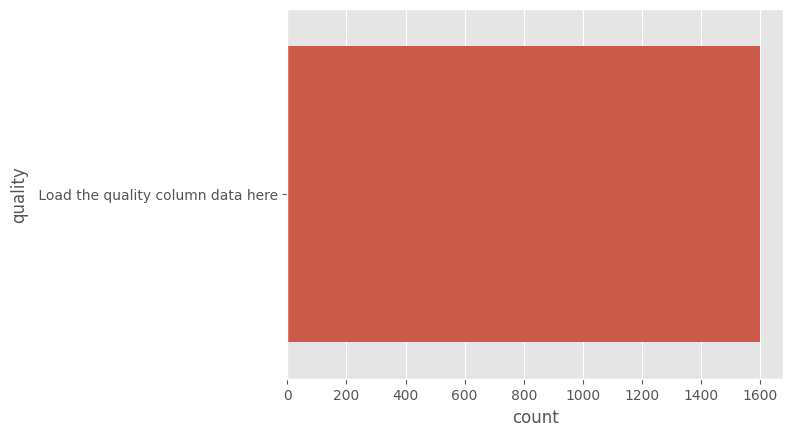

In [15]:
style.use('ggplot')
sns.countplot(wine_df['quality'])


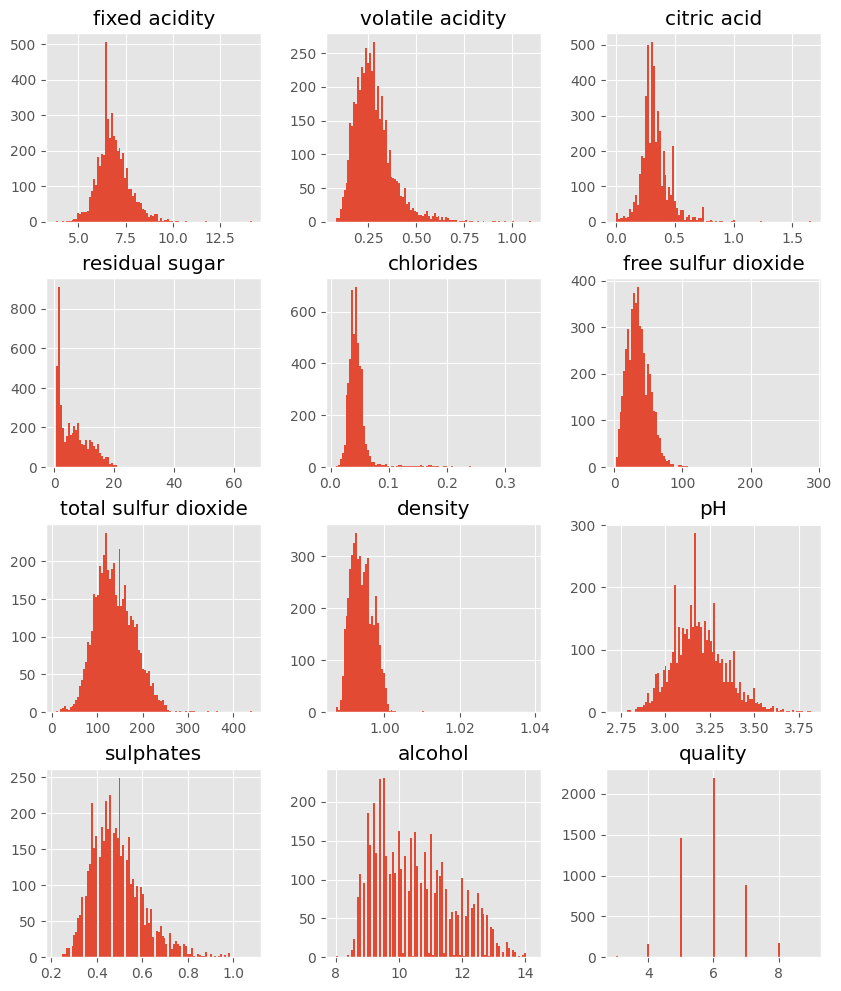

In [19]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()


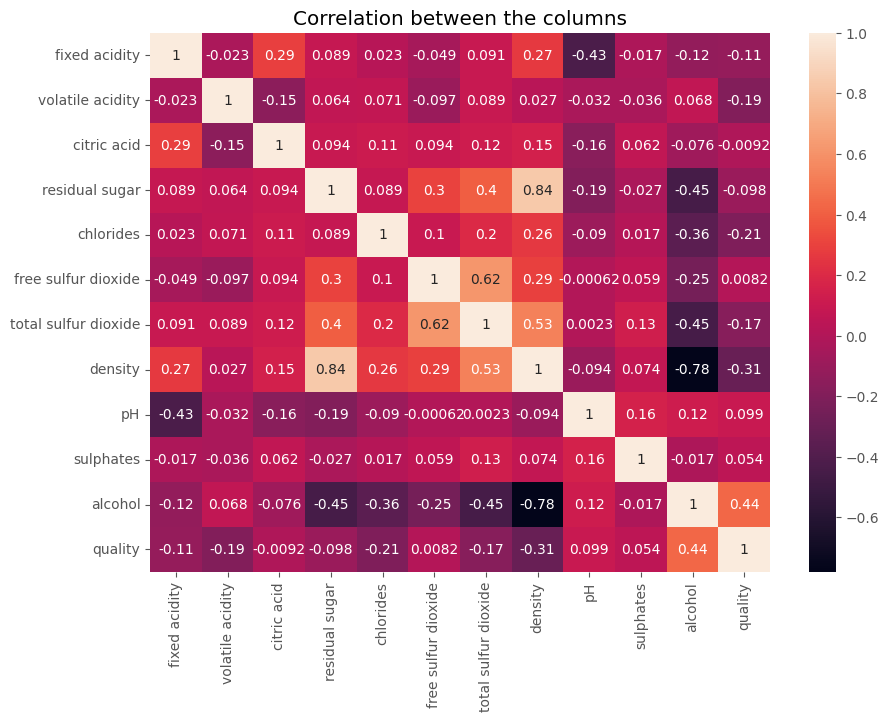

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()


In [21]:
wine_df.corr()['quality'].sort_values()

density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

<Axes: ylabel='quality'>

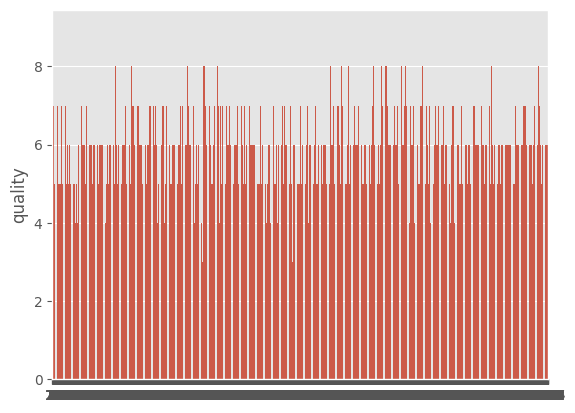

In [24]:
sns.barplot(wine_df['quality'])

<Axes: ylabel='alcohol'>

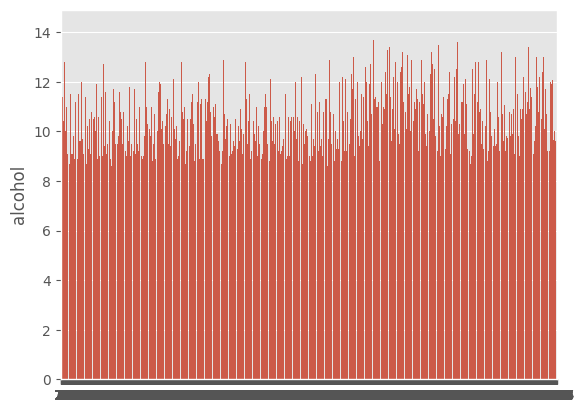

In [28]:
sns.barplot(wine_df['alcohol'])

<Axes: ylabel='pH'>

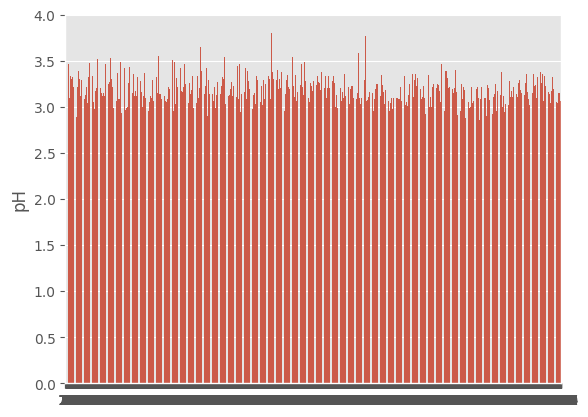

In [29]:
sns.barplot(wine_df['pH'])

In [30]:
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

In [31]:
wine_df['quality'].value_counts()

quality
0    3838
1    1060
Name: count, dtype: int64

In [32]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [34]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)


X_train  (3428, 11)
y_train  (3428,)
X_test  (1470, 11)
y_test  (1470,)


In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))


test accuracy is: 79.46%


In [36]:
print(classification_report(y_test, logreg_pred))


              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1141
           1       0.62      0.22      0.32       329

    accuracy                           0.79      1470
   macro avg       0.71      0.59      0.60      1470
weighted avg       0.77      0.79      0.75      1470



TN:  1097
FN:  258
TP:  71
FP:  44


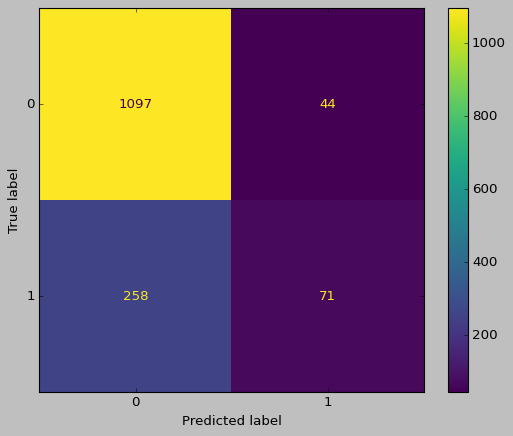

In [37]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])



In [39]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 82.59%


In [40]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1141
           1       0.61      0.62      0.62       329

    accuracy                           0.83      1470
   macro avg       0.75      0.75      0.75      1470
weighted avg       0.83      0.83      0.83      1470



TN:  1009
FN:  124
TP:  205
FP:  132


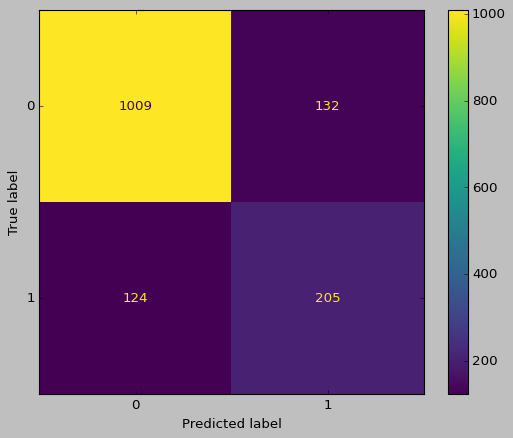

In [41]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [42]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 88.30%


In [43]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1141
           1       0.82      0.61      0.70       329

    accuracy                           0.88      1470
   macro avg       0.86      0.79      0.81      1470
weighted avg       0.88      0.88      0.88      1470



TN:  1098
FN:  129
TP:  200
FP:  43


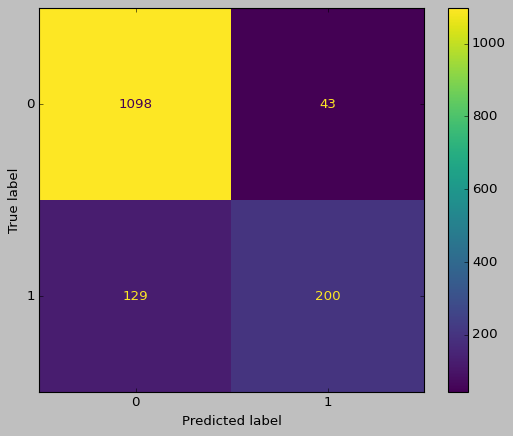

In [44]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])